<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Classification_Project_Shufersal_Detergents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project - DETERGENTS

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

To run the raw section, one must load Sweets_ver2.csv to local google drive and change the next line to True

In [12]:
id = ''  # name of result file
prefix = 'Shufersal_Detergents'

RAW = True
DIFF = False

if not DIFF:
  id = 'no_diff'

In [13]:
fname = 'Detergents.csv'
subdir = ''
data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/ClassificationProject/main/' + subdir + fname

df1 = pd.read_csv(data_url, nrows=1)
df2 = pd.read_csv(data_url, usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])
d(df1)

,OrderNumbert,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,SubGroupName,CompoundID,CompoundIDDesc,ParentProductNumber,ProductDescription,BrandIndDesc,BrandName,VendorNumber,VendorName,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,DepartmentNameSusb,CategoryCodeSubs,CategoryNameSubs,GroupCodeSubs,GroupNameSubs,SubGroupCodeSubs,SubGroupNameSubs,CompoundIDSubs,CompoundIDDescSubs,ProductNumberSubs,ProductDescriptionSubs,BrandIndDescSuss,BrandNameSubs,VendorNumberSubs,VendorNameSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,NetSaleNoVatPrdSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,16800,1,ראשון לציון,202101,202103,202111,4,HolidayPeriod,17/03/2021,13,13-טיפוח הבית,22,דטרגנטים,485,מוצרי כביסה נילווים,3,מסיר כתמים תרסיס/מילוי לתרסיס,-286921,"סנוקל רסס וכבס 750 מ""ל",286921,"סנוקל רסס וכבס 750 מ""ל",סנו,לא מותג פרטי,910215,"""החברה הדרומית לשיווק בע",0.75,12,"750 מ""ל",16.9,1,45,835.7,30188,0.9,17,NaN,noPromo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13-טיפוח הבית,22,דטרגנטים,485,מוצרי כביסה נילווים,3,מסיר כתמים תרסיס/מילוי לתרסיס,-5430602,אוקסיג'ן מ.כתמ.מרסס 750מ,5430602,אוקסיג'ן מ.כתמ.מרסס 750מ,אוקסיג'ן,לא מותג פרטי,910215,"""החברה הדרומית לשיווק בע",0.75,12,"750 מ""ל",17.9,119191.23,0.6,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
def get_raw(fname, subdir=''):
  data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/ClassificationProject/main/' + subdir + fname
  return pd.read_csv(data_url)

In [15]:
def diff_list(li1, li2):
  p(len(li1), len(li2))
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

### Cans dataset identical features as Sweets - the diff list returns empty list

In [16]:
if RAW:
  fname = 'Sweets.csv'
  df_sweet = get_raw(fname)
  d(diff_list(list(df1.columns), list(df_sweet.columns)))

82 82


[]

In [17]:
if RAW:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OrderNumbert                1 non-null      int64  
 1   HouseHoldID                 1 non-null      int64  
 2   LocationCityName            1 non-null      object 
 3   QuarterNumber               1 non-null      int64  
 4   MonthNumber                 1 non-null      int64  
 5   WeekNumber                  1 non-null      int64  
 6   DayNumberInWeek             1 non-null      int64  
 7   PeriodHoliday               1 non-null      object 
 8   TransactionDate             1 non-null      object 
 9   DepartmentCode              1 non-null      int64  
 10  DepartmentName              1 non-null      object 
 11  CategoryCode                1 non-null      int64  
 12  CategoryName                1 non-null      object 
 13  GroupCode                   1 non-null 

Eliminating unwanted columns - mostly descriptive columns

In [18]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

82 62


['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [19]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61325 entries, 0 to 61324
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 61325 non-null  int64  
 1   LocationCityName            61303 non-null  object 
 2   QuarterNumber               61325 non-null  int64  
 3   MonthNumber                 61325 non-null  int64  
 4   WeekNumber                  61325 non-null  int64  
 5   DayNumberInWeek             61325 non-null  int64  
 6   PeriodHoliday               61325 non-null  object 
 7   DepartmentCode              61325 non-null  int64  
 8   CategoryCode                61325 non-null  int64  
 9   GroupCode                   61325 non-null  int64  
 10  SubGroupCode                61325 non-null  int64  
 11  CompoundID                  61325 non-null  int64  
 12  ParentProductNumber         61325 non-null  int64  
 13  BrandIndDesc                613

None

In [20]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [21]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61325 entries, 0 to 61324
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     61325 non-null  int64  
 1   LocationCityName                61325 non-null  object 
 2   QuarterNumber                   61325 non-null  int64  
 3   MonthNumber                     61325 non-null  int64  
 4   WeekNumber                      61325 non-null  int64  
 5   DayNumberInWeek                 61325 non-null  int64  
 6   PeriodHoliday                   61325 non-null  object 
 7   DepartmentCode                  61325 non-null  int64  
 8   CategoryCode                    61325 non-null  int64  
 9   GroupCode                       61325 non-null  int64  
 10  SubGroupCode                    61325 non-null  int64  
 11  CompoundID                      61325 non-null  int64  
 12  ParentProductNumber             

None

In [22]:
if RAW and False:
  df2.to_csv(prefix + '.csv', index = False)
  p(df2.shape)

In [23]:
if RAW and False:
  df = pd.read_csv(prefix + '.csv', index_col=False)
else:
  df = df2.copy()
p(df.shape)  

(61325, 62)


## Encoding categories

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

if RAW:
  enc.fit(['PromoSusbDiffPromo', 'PromoSusbSamePromo', 'noPromo'])
  p(df.isPromo.value_counts())
  p()
  df.isPromo = enc.transform(df.isPromo)
  p(df.isPromo.value_counts())

PromoSusbDiffPromo    33841
noPromo               25138
PromoSusbSamePromo     2346
Name: isPromo, dtype: int64

0    33841
2    25138
1     2346
Name: isPromo, dtype: int64


In [29]:
if RAW:
  df['LocationCityName'] = df['LocationCityName'].astype('str')
  df['BrandIndDesc'] = df['BrandIndDesc'].astype('str')
  df['BrandIndDescSubs'] = df['BrandIndDescSubs'].astype('str')
  for col in ['LocationCityName', 'PeriodHoliday', 'BrandIndDesc', 'BrandName', 'BrandIndDescSubs', 'BrandNameSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

LocationCityName
Index(['86', '98', '87', '29', '32', '63', '17', '92', '28', '50', '15', '94',
       '54', '59', '39', '93', '10', '84', '25', '7', '36', '41', '81', '88',
       '82', '64', '96', '24', '14', '2', '11', '43', '83', '91', '72', '19',
       '77', '90', '75', '56', '69', '38', '52', '99', '18', '22', '13', '79',
       '58', '60', '34', '47', '76', '62', '33', '27', '21', '4', '12', '3',
       '48', '1', '8', '78', '40', '46', '37', '61', '80', '51', '45', '71',
       '68', '95', '0', '6', '89', '44', '97', '35', '5', '73', '20', '67',
       '30', '31', '42', '49', '23', '85', '65', '16', '74', '26', '70', '57',
       '66', '55', '53', '9'],
      dtype='object')
Int64Index([85, 98, 86, 22, 26, 60,  9, 92, 21, 46,  7, 94, 50, 55, 33, 93,  2,
            83, 18, 67, 30, 36, 80, 87, 81, 61, 96, 17, 12,  6,  3, 38, 82, 70,
            91, 11, 75, 90, 73, 52, 66, 32, 48, 99, 10, 15,  5, 77, 54, 57, 28,
            42, 74, 59, 27, 34, 14, 20,  4, 43, 23,  1, 78, 76, 35,

## Combine 'GroupCode' and 'SubGroupCode' into one column

In [30]:
if RAW:
  d(df.head(2))
  df.SubGroupCode = df.GroupCode * 10 + df.SubGroupCode
  df.SubGroupCodeSubs = df.GroupCodeSubs * 10 + df.SubGroupCodeSubs
#  df.drop(['SubGroupCode', 'SubGroupCodeSubs'], axis=1, inplace=True)
  d(df.head(2))

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,85,202101,202103,202111,4,0,13,22,485,3,-286921,286921,14,0,910215,0.75,16.9,1,45,835.70,30188.00,0.9,17,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,485,3,-5430602,5430602,63,0,910215,0.750,17.9,119191.23,0.6,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,85,202101,202102,202105,4,1,13,22,475,2,-5900627063233,5900627063233,30,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,17,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,2,-4607109409619,4607109409619,48,0,913719,0.025,29.6,1754.32,1.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,85,202101,202103,202111,4,0,13,22,485,4853,-286921,286921,14,0,910215,0.75,16.9,1,45,835.70,30188.00,0.9,17,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,485,4853,-5430602,5430602,63,0,910215,0.750,17.9,119191.23,0.6,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,85,202101,202102,202105,4,1,13,22,475,4752,-5900627063233,5900627063233,30,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,17,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,4752,-4607109409619,4607109409619,48,0,913719,0.025,29.6,1754.32,1.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Use Dummies

Minimal improvement - FalseNegative (0,0) improved from 1338 to 1328

In [31]:
## Converting the categories column (isPromo) to dummies column 
if RAW:
  p(df.shape)
  df = pd.get_dummies(df, columns=['isPromo', 'PeriodHoliday'])
  p(df.shape)

(61325, 62)
(61325, 65)


In [32]:
if RAW:
  df_t = df.copy()

## Calc diff vector

In [33]:
if RAW:
  p(df.columns)

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'DepartmentCode', 'CategoryCode',
       'GroupCode', 'SubGroupCode', 'CompoundID', 'ParentProductNumber',
       'BrandIndDesc', 'BrandName', 'VendorNumber', 'UnitOfMeasure', 'Price',
       'Quantity', 'cntPrdAll', 'NetSaleAmountAll',
       'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths',
       'DiscountPerUnit', 'Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman',
       'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
       'HelbonSubs', 'ShumanSubs',

In [34]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [35]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)    # tested both ==0 and !=0 (the result is 1 for one and 0 for the other - no change in the model results)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [36]:
if RAW and DIFF:
  df.to_csv(prefix+ '_with_diff.csv', index = False)

In [37]:
if RAW and DIFF:
  df = pd.read_csv(prefix + '_with_diff.csv', index_col=False)
  p(df.shape)

# Get ready Data

In [38]:
if RAW:
  p(df.shape)
  d(df.head())

(61325, 65)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1
0,1,85,202101,202103,202111,4,13,22,485,4853,-286921,286921,14,0,910215,0.75,16.9,1,45,835.70,30188.00,0.9,17,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,485,4853,-5430602,5430602,63,0,910215,0.750,17.9,119191.23,0.6,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0
1,1,85,202101,202102,202105,4,13,22,475,4752,-5900627063233,5900627063233,30,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,17,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,4752,-4607109409619,4607109409619,48,0,913719,0.025,29.6,1754.32,1.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1
2,1,85,202101,202103,202111,4,13,22,488,4883,36049,8690784516778,23,0,914133,0.75,9.0,2,45,835.70,33592.29,0.9,17,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,488,4883,36049,8690784516662,16,0,914133,0.750,9.0,37535.36,0.9,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0
3,2,85,202101,202101,202101,5,13,22,486,4861,20415,7290012117534,5,0,910215,1.00,15.9,1,21,391.50,175023.59,0.6,17,1.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,486,4861,20415,7290012117541,25,0,910215,1.000,14.0,89072.36,0.7,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
4,2,85,202101,202101,202103,2,13,22,477,4772,-5425714,5425714,14,0,910215,0.60,26.9,1,34,1085.25,16511.42,1.0,17,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,477,4772,-287102,287102,32,0,910215,0.540,19.9,31582.06,0.9,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1


In [39]:
if not RAW:
  df = pd.read_csv(prefix + '_with_diff.csv', encoding='ISO-8859-8')
  p(df.shape)
  d(df.head())

# Models

In [44]:
REMOVE_ING = False
SPLIT_DATE = False
ONLY_PRICE = False
GS = False
CV = False

SWEETS = False

## Models - remove ingredients - no change in results

In [41]:
if REMOVE_ING:
  id = 'remove_ingredients'
  try:
    del X_train, X_test, y_train, y_test
  except:
    pass
  
  cols = ['CorrelateItemStatusCode']
  for col in ['Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar']:
      cols.append(col)
      cols.append(col + 'Subs')
      cols.append(col + 'Diff')

  X = df.drop(cols, axis=1)
  y = df.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
  p(df.shape)
  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37912, 88)

(26538, 57) (11374, 57) (26538,) (11374,)

## Models - remove all features execpt of prices

In [42]:
if ONLY_PRICE:
  id = 'only_prices'
  try:
    del X_train, X_test, y_train, y_test
  except:
    pass
  
  X = df[['Price', 'PriceSubs', 'PriceDiff']]
  y = df.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
  p(df.shape)
  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37912, 88)

(26538, 3) (11374, 3) (26538,) (11374,)

## Models - Train on sweets, test on detergents

In [45]:
if SWEETS:
  get_raw('Shufersal_with_diff.csv')
  df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  p(df.shape)
  d(df.head(1))

In [46]:
if SWEETS:
  df_sweets = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  X_train = df_sweets.drop('CorrelateItemStatusCode', axis=1)
  y_train = df_sweets.CorrelateItemStatusCode.astype(int)

  p(df_sweets.shape, X_train.shape, y_train.shape)
  d(df_sweets.head())

In [47]:
if SWEETS:
  df_cans = pd.read_csv(prefix + '_with_diff.csv', index_col=False)
  X_test = df_cans.drop('CorrelateItemStatusCode', axis=1)
  y_test = df_cans.CorrelateItemStatusCode.astype(int)

  p(df_cans.shape, X_test.shape, y_test.shape)
  d(df_cans.head())

  id = 'train_sweet_pred_detergents'


## Models - process_model code

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [50]:
def report(clf, X, y, note, test, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  if test:  # do not add to database
    d(df)
  else:    
    df.reset_index(inplace=True)
    df_result.reset_index(inplace=True)
    df_result = df_result.append(df, ignore_index=True)
    df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [51]:
#ROC and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_roc_and_auc(model,X_test,y_test):
    ns_probs = [0 for _ in range(len(y_test))]
#    lr_probs = clf_voting.predict_proba(X_test)[:,1]
    lr_probs = model.predict_proba(X_test)[:,1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
    print('model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    fig = plt.figure(figsize=(5,5))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(type(model).__name__ )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [52]:
def showFeatureImportance(model, X, threshold):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [53]:
def process_model(model, X, y, X_test, y_test, plot=False, threshold=0, note='', test=False):
  p('running: ', type(model).__name__, X.shape)
  model.fit(X, y)
  report(model, X, y, note, test, 'Train')
  report(model, X_test, y_test, note, test)
  if plot:
    showFeatureImportance(model, X, threshold)
    get_roc_and_auc(model,X_test,y_test)
  return df_result 

In [54]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


## Models - Run process_model

running:  RandomForestClassifier (42927, 64)

No Skill: ROC AUC=0.500
model: ROC AUC=0.902


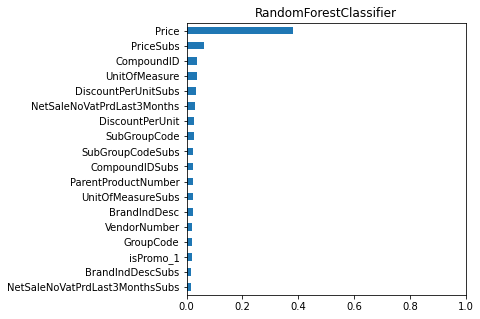

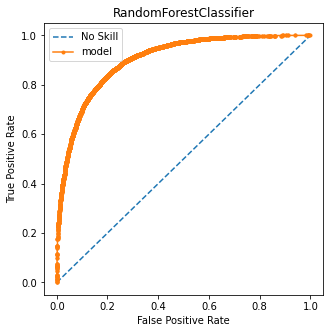

0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      7741.0   5149.0       0.88    0.60   
                              1      1032.0  29005.0       0.85    0.97   
RandomForestClassifier: Test  0      3097.0   2410.0       0.86    0.56   
                              1       515.0  12376.0       0.84    0.96   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.71      0.86  12890.0   
                              1          0.90      0.86  30037.0   
RandomForestClassifier: Test  0          0.68      0.84   5507.0   
                              1          0.89      0.84  12891.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.87        0.78          0.81   
                              1               0.87        0.78          0.81   
RandomForestClassifier: Test  0               0.85        0.76          0.79   
                              1               0.85        0.76          0.79   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                         
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1

In [55]:
df_result = pd.DataFrame()

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73)
process_model(clf_RF, X_train, y_train, X_test, y_test, plot=True, threshold=0.015, note="n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73")

d(df_result)

fname = prefix + f'_result_{id}.csv'
df_result.to_csv(fname, index = True)

## Models - compare results

1. Diff
2. Diff with remove ingredients columns
6. OnlyPrices - Diff with only 3 features( Price, PriceSubs, PriceDiff)
7. Train on sweets, predict on detergents
8. No Diff (no comparison between master and subs)

In [56]:
def read_results(id='', disp=True, full=False):
  fname = prefix + f'_result_{id}.csv'
  p(fname)
  try:
    df = pd.read_csv(fname)
  except:
    try:
      df = get_raw(fname, 'Results/')
#      df = pd.read_csv(fname)
    except:
      p('No data')
      return
  df.set_index(['name', 'index'], inplace=True)
  if not full:
    df = df.loc[['RandomForestClassifier: Train', 'RandomForestClassifier: Test']]#.copy()
  if disp:
    pd.set_option("max_column", 120)
    d(df)
  return df

In [57]:
p(id)
read_results()
read_results('remove_ingredients')
read_results('only_prices')
read_results('train_sweet_pred_detergents')
read_results('no_diff')
p()

no_diff
Shufersal_Detergents_result_.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8067.0   4841.0       0.86    0.62   
                              1      1276.0  28744.0       0.86    0.96   
RandomForestClassifier: Test  0      3243.0   2248.0       0.83    0.59   
                              1       644.0  12264.0       0.85    0.95   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.73      0.86  12908.0   
                              1          0.90      0.86  30020.0   
RandomForestClassifier: Test  0          0.69      0.84   5491.0   
                              1          0.89      0.84  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.86        0.79          0.81   
                              1               0.86        0.79          0.81   
RandomForestClassifier: Test  0               0.84        0.77          0.79   
                              1               0.84        0.77          0.79   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_remove_ingredients.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8322.0   4586.0       0.86    0.64   
                              1      1315.0  28705.0       0.86    0.96   
RandomForestClassifier: Test  0      3331.0   2160.0       0.83    0.61   
                              1       674.0  12234.0       0.85    0.95   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.74      0.86  12908.0   
                              1          0.91      0.86  30020.0   
RandomForestClassifier: Test  0          0.70      0.85   5491.0   
                              1          0.90      0.85  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.86        0.80          0.82   
                              1               0.86        0.80          0.82   
RandomForestClassifier: Test  0               0.84        0.78          0.80   
                              1               0.84        0.78          0.80   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_only_prices.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      6940.0   5968.0       0.78    0.54   
                              1      1948.0  28072.0       0.82    0.94   
RandomForestClassifier: Test  0      2925.0   2566.0       0.78    0.53   
                              1       849.0  12059.0       0.82    0.93   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.64      0.82  12908.0   
                              1          0.88      0.82  30020.0   
RandomForestClassifier: Test  0          0.63      0.81   5491.0   
                              1          0.88      0.81  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0                0.8        0.74          0.76   
                              1                0.8        0.74          0.76   
RandomForestClassifier: Test  0                0.8        0.73          0.75   
                              1                0.8        0.73          0.75   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_train_sweet_pred_detergents.csv


0        1  precision  recall  \
name                          index                                        
RandomForestClassifier: Train 0      12719.0   5349.0       0.84    0.70   
                              1       2412.0  33980.0       0.86    0.93   
RandomForestClassifier: Test  0      10759.0   7640.0       0.56    0.58   
                              1       8394.0  34534.0       0.82    0.80   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.77      0.86  18068.0   
                              1          0.90      0.86  36392.0   
RandomForestClassifier: Test  0          0.57      0.74  18399.0   
                              1          0.81      0.74  42928.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.85        0.82          0.83   
                              1               0.85        0.82          0.83   
RandomForestClassifier: Test  0               0.69        0.69          0.69   
                              1               0.69        0.69          0.69   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_no_diff.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      7741.0   5149.0       0.88    0.60   
                              1      1032.0  29005.0       0.85    0.97   
RandomForestClassifier: Test  0      3097.0   2410.0       0.86    0.56   
                              1       515.0  12376.0       0.84    0.96   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.71      0.86  12890.0   
                              1          0.90      0.86  30037.0   
RandomForestClassifier: Test  0          0.68      0.84   5507.0   
                              1          0.89      0.84  12891.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.87        0.78          0.81   
                              1               0.87        0.78          0.81   
RandomForestClassifier: Test  0               0.85        0.76          0.79   
                              1               0.85        0.76          0.79   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN